In [1]:
!git clone https://github.com/AvonYangXX1/DreamWalker.git

Cloning into 'DreamWalker'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 275 (delta 12), reused 59 (delta 9), pack-reused 211
Receiving objects: 100% (275/275), 886.36 MiB | 19.46 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (115/115), done.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.5 MB/s eta 0:00:00


In [ ]:
# from Bio.Align import PairwiseAligner
# from Bio.Align import substitution_matrices

# def calculate_blosum62_score(seq1, seq2):
#     aligner = PairwiseAligner()
#     aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
#     aligner.open_gap_score = -10
#     aligner.extend_gap_score = -0.5
#     score = aligner.score(seq1, seq2)  # Get the best score
#     return score


In [10]:
amp0_data = pd.read_csv("/content/DreamWalker/data/source_data/AMP0_data.csv")
amp0_data

,DBAASP ID,C-terminus modification,N-terminus modification,Sequence,Target species,MIC (?g/mL )
0,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Bacillus subtilis,1.416819
1,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Staphylococcus aureus,283.363770
2,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Escherichia coli,155.850074
3,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Pseudomonas aeruginosa,184.186451
4,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Candida albicans,198.354639
...,...,...,...,...,...,...
30707,4444,#,#,GLPRKILCAIAKKKGKCKGPLKLVCKC,Escherichia coli,121.706243
30708,4444,#,#,GLPRKILCAIAKKKGKCKGPLKLVCKC,Pseudomonas aeruginosa,289.776770
30709,4444,#,#,GLPRKILCAIAKKKGKCKGPLKLVCKC,Candida albicans,72.444192
30710,8091,#,#,sHkWlWlW,Staphylococcus aureus,10.000000


In [ ]:
# # pep_whole npz
# pep_whole= np.load('/content/DreamWalker/data/processed_data/AMP/pep_whole.npz')
# for arr in pep_whole:
#     print(arr)
# pep_whole[arr]

data


array([[ 5,  3, 11, ...,  0,  0,  0],
       [ 5,  3, 11, ...,  0,  0,  0],
       [ 5,  3, 11, ...,  0,  0,  0],
       ...,
       [ 5,  3, 11, ...,  0,  0,  0],
       [33, 16, 23, ...,  0,  0,  0],
       [33, 16, 23, ...,  0,  0,  0]])

In [11]:
amp0_data_unique = amp0_data.drop_duplicates(subset=['Sequence'])
amp0_data_unique

,DBAASP ID,C-terminus modification,N-terminus modification,Sequence,Target species,MIC (?g/mL )
0,4446,#,#,GLPRKILCAIAKKKGKAKGPLKLVCKA,Bacillus subtilis,1.416819
5,4447,#,#,GLPRKILAAIAKKKGKCKGPLKLVAKC,Bacillus subtilis,11.901278
10,6972,AMD,#,LRKAKKIAKKLF,Pectobacterium carotovorum,10.000000
16,11542,AMD,#,GSGSGSGSLKKIFKKPMVIGVTIPF,Klebsiella pneumoniae,9.000000
19,11540,#,#,GFGCPLNERECHSHCQSIGRKFGYCGGTLRLTCICGKE,Klebsiella pneumoniae,1.040443
...,...,...,...,...,...,...
30683,5637,AMD,ACT,KQLIRFLKRLDRNLWGLA,Escherichia coli,10.083126
30689,6975,AMD,#,KRRLILRILRLAIRALVKKR,Pectobacterium carotovorum,10.000000
30695,8480,AMD,#,AIHDILKYGKPS,Escherichia coli,67.077715
30700,8488,AMD,#,GIHAILKYGKPS,Escherichia coli,64.175910


In [17]:
amp0_data_unique['Sequence_Set'] = amp0_data_unique['Sequence'].apply(lambda x: set(x.upper()))

<ipython-input-17-03ab242478bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amp0_data_unique['Sequence_Set'] = amp0_data_unique['Sequence'].apply(lambda x: set(x.upper()))


In [18]:
sequence_sets = amp0_data_unique['Sequence_Set'].tolist()


In [19]:
jaccard_distances = pdist(sequence_sets, lambda u, v: jaccard_distance(u, v))

ValueError: A 2-dimensional array must be passed.

In [12]:
# results = []

# for i in range(len(amp0_data_unique)):
#     for j in range(i, len(amp0_data_unique)):
#         peptide_1 = amp0_data_unique['Sequence'].iloc[i].upper()
#         peptide_2 = amp0_data_unique['Sequence'].iloc[j].upper()
#         score = calculate_blosum62_score(peptide_1, peptide_2)
#         results.append({
#             "Peptide_1": peptide_1,
#             "Peptide_2": peptide_2,
#             "BLOSUM62_Score": score
#         })

# # Create DataFrame from results
# results_df = pd.DataFrame(results)


# if results_df.empty:
#     print("No valid comparisons were made.")
# else:
#     # Aggregate and pivot the data
#     agg_df = results_df.groupby(['Peptide_1', 'Peptide_2']).BLOSUM62_Score.mean().reset_index()
#     pivot_df = agg_df.pivot_table(index='Peptide_1', columns='Peptide_2', values='BLOSUM62_Score')

#     # Create heatmap
#     cmap = sns.diverging_palette(250, 10, s=85, l=25, n=9, as_cmap=True)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(pivot_df, cmap=cmap, center=0)
#     plt.title('Heatmap of Average BLOSUM62 Scores within AMP0 Dataset')
#     plt.xlabel("AMP Sequence")
#     plt.ylabel("AMP Sequence")
#     plt.savefig("heatmap.png")  # Save the figure
#     plt.show()

In [13]:
from scipy.spatial.distance import pdist, squareform

In [20]:
def jaccard_distance(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return 1 - intersection / union

In [21]:
amp0_data_unique = amp0_data.drop_duplicates(subset=['Sequence'])


In [22]:
amp0_data_unique['Sequence_Set'] = amp0_data_unique['Sequence'].apply(lambda x: set(x.upper()))

sequences = amp0_data_unique['Sequence'].tolist()
n = len(sequences)
jaccard_distances = np.zeros((n, n))

<ipython-input-22-2f186d05364c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amp0_data_unique['Sequence_Set'] = amp0_data_unique['Sequence'].apply(lambda x: set(x.upper()))


In [23]:
for i in range(n):
    for j in range(i, n):
        dist = jaccard_distance(amp0_data_unique['Sequence_Set'].iloc[i], amp0_data_unique['Sequence_Set'].iloc[j])
        jaccard_distances[i, j] = dist
        jaccard_distances[j, i] = dist


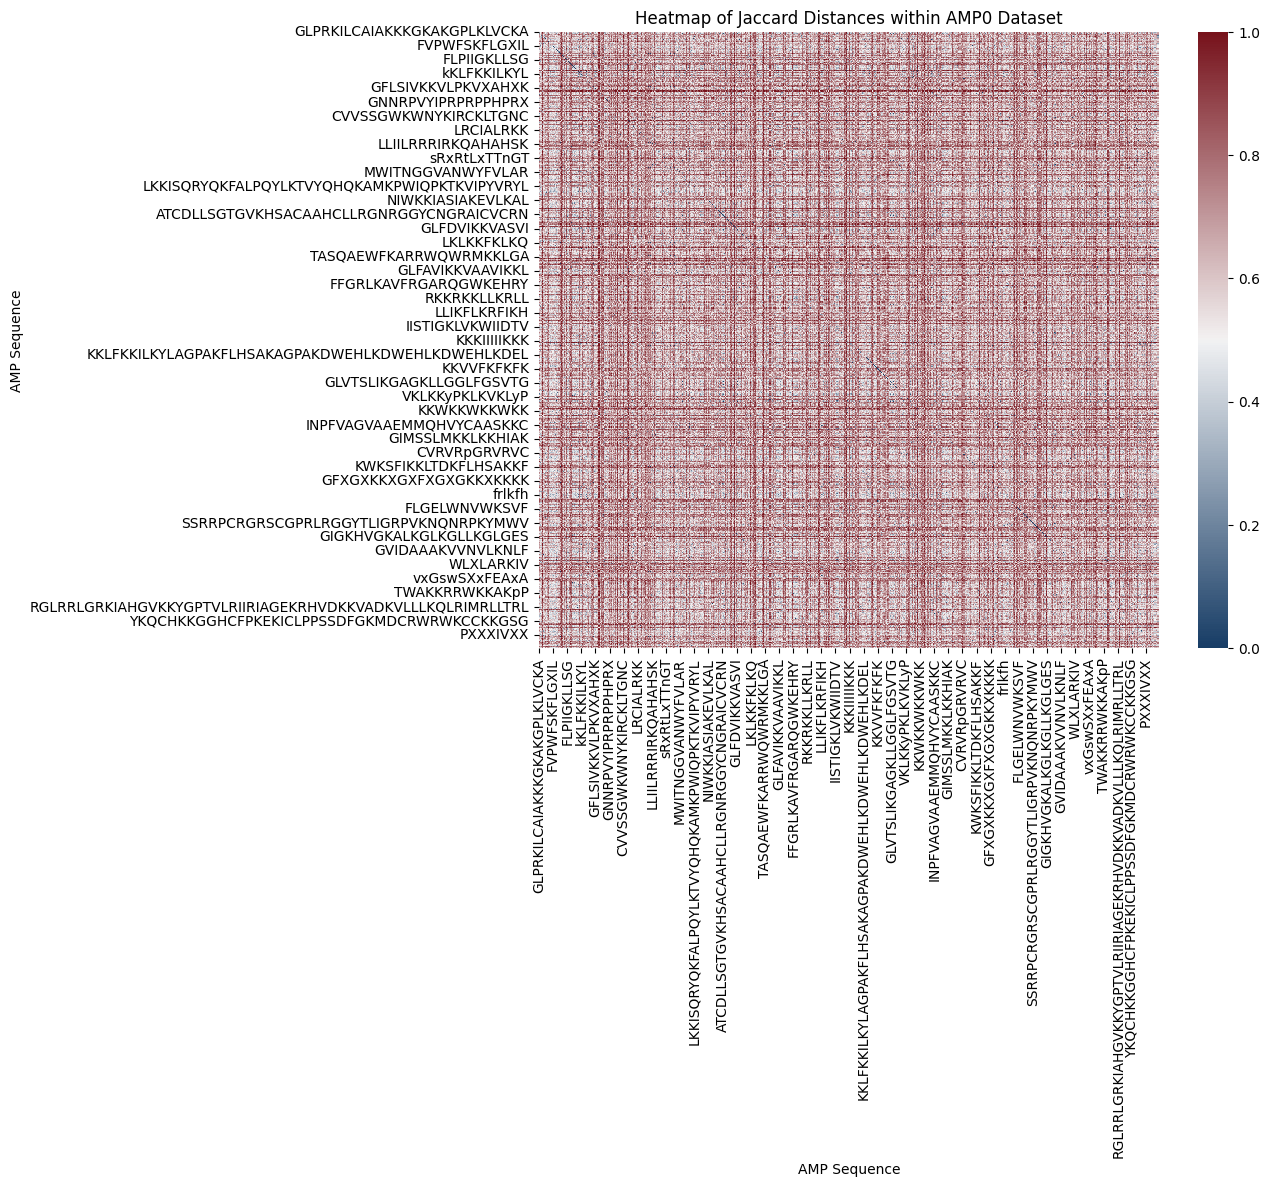

In [26]:
jaccard_df = pd.DataFrame(jaccard_distances, index=sequences, columns=sequences)
cmap = sns.diverging_palette(250, 10, s=85, l=25, n=9, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_df, cmap=cmap)
plt.title('Heatmap of Jaccard Distances within AMP0 Dataset')
plt.xlabel("AMP Sequence")
plt.ylabel("AMP Sequence")
plt.show()